# Dataset Exploration: PISA 2012
## by Tien-Thanh Nguyen

## Preliminary Wrangling

> The Programme for International Student Assessment (PISA) is a international survey which aims to evaluate education systems worldwide by testing the skills and knowledge of 15-year-old students who are nearing the end of their compulsory education. PISA assesses how well they can apply what they learn in school to real-life situations.

> This dataset contains the result of the survey for 2012.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

> Load in the dataset

In [2]:
pisa=pd.read_csv('pisa2012_clean.csv')
pisa.head()

Student_Id  Gender  Country  Math_Score  Reading_Score  Science_Score  \
0           2  Female  Albania    486.1427       406.2936       548.9929   
1           3  Female  Albania    533.2684       401.2100       499.6643   
2           4  Female  Albania    412.2215       547.3630       438.6796   
3           6  Female  Albania    396.3312       378.2544       384.3156   
4           7  Female  Albania    438.0823       373.2503       508.1499   

   Study_Time_With_Parent Parents Highest Education Immigration_Status  \
0                       0               ISCED 5A, 6             Native   
1                       2               ISCED 5A, 6             Native   
2                       0               ISCED 5A, 6             Native   
3                       1               ISCED 3B, C             Native   
4                       0               ISCED 5A, 6             Native   

  Parents_Presence  Overall_Score  
0             Both     480.476400  
1             Both     478.047567  
2             Both     466.088033  
3             Both     386.300400  
4             Both     439.827500

In [3]:
pisa.shape

(258484, 11)

In [4]:
pisa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258484 entries, 0 to 258483
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Student_Id                 258484 non-null  int64  
 1   Gender                     258484 non-null  object 
 2   Country                    258484 non-null  object 
 3   Math_Score                 258484 non-null  float64
 4   Reading_Score              258484 non-null  float64
 5   Science_Score              258484 non-null  float64
 6   Study_Time_With_Parent     258484 non-null  int64  
 7   Parents Highest Education  258484 non-null  object 
 8   Immigration_Status         258484 non-null  object 
 9   Parents_Presence           258484 non-null  object 
 10  Overall_Score              258484 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 21.7+ MB


### What is the structure of your dataset?

This is clean dataset contains 11 features and 258484 student survey results done from the `data_cleaning` file   

### What is/are the main feature(s) of interest in your dataset?

I'm interested to know what feature impact the score of the student in math, reading and science.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The scores value for mathematic, reading and science.

I would like to investigate the influence of parent, country, gender on the scores. 

Being an immigrant myself, I would like to consider the immigrant feature and it effect on the PISA score.

## Univariate Exploration

First we want to see the performance of the student in different subjects

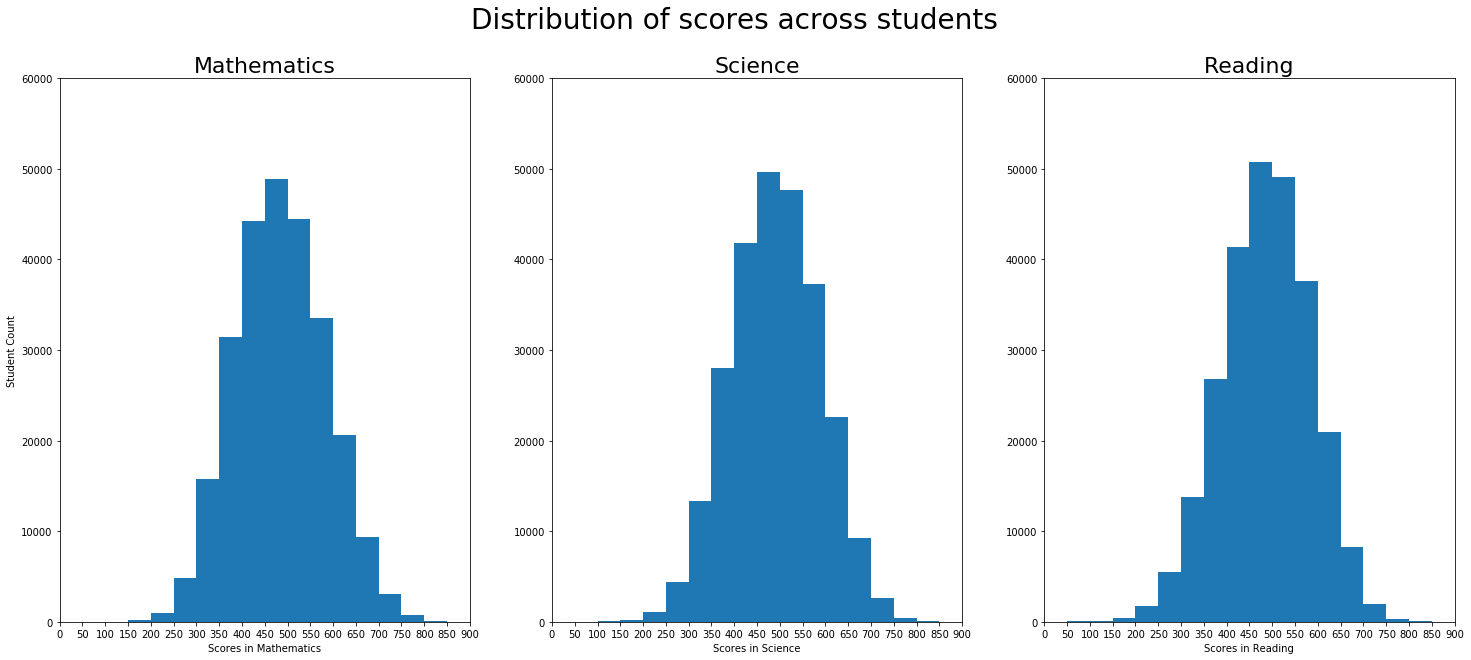

In [5]:
plt.figure(figsize = [25, 10])

bins_hist = np.arange(0, 900 + 1, 50)

# subplot 1/3
plt.subplot(1, 3, 1)
plt.hist(pisa['Math_Score'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 60000);
plt.xticks(bins_hist)
plt.xlabel('Scores in Mathematics');
plt.ylabel('Student Count')
plt.title("Mathematics", fontsize=22);

# subplot 2/3
plt.subplot(1, 3, 2)
plt.hist(pisa['Science_Score'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 60000);
plt.xticks(bins_hist)
plt.xlabel('Scores in Science');
plt.title("Science", fontsize=22);

# subplot 3/3
plt.subplot(1, 3, 3)
plt.hist(pisa['Reading_Score'], bins = bins_hist);

plt.xlim(0, 900);
plt.ylim(0, 60000);
plt.xticks(bins_hist)
plt.xlabel('Scores in Reading');
plt.title("Reading", fontsize=22);
# set the overall title
plt.suptitle('Distribution of scores across students', fontsize=28);

Our takes:
- No major difference in subjects
- All are unimodal and close to normal distribution

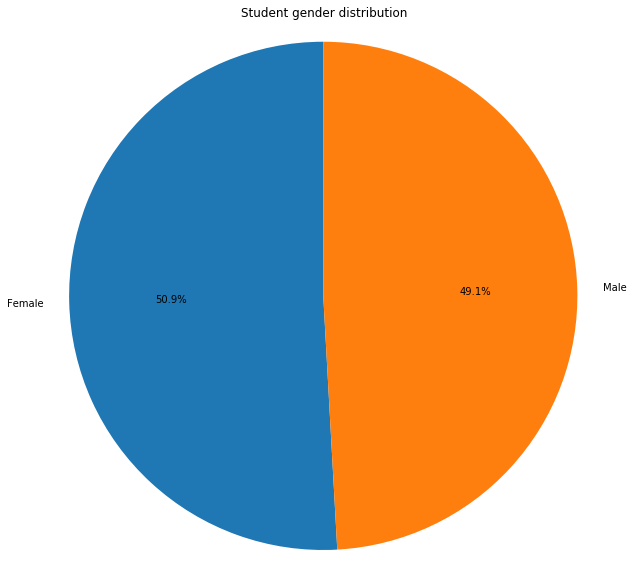

In [6]:
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
patches, texts, autotexts = ax1.pie(pisa.Gender.value_counts(), 
                                    labels=['Female','Male'],
                                    autopct='%1.1f%%',
                                    startangle=90
                                   );
   
ax1.axis('equal');
plt.tight_layout();
plt.title('Student gender distribution')
plt.show();

#### Gender analysis:

Both genders are equivalently represented, so there's no biased in the dataset.

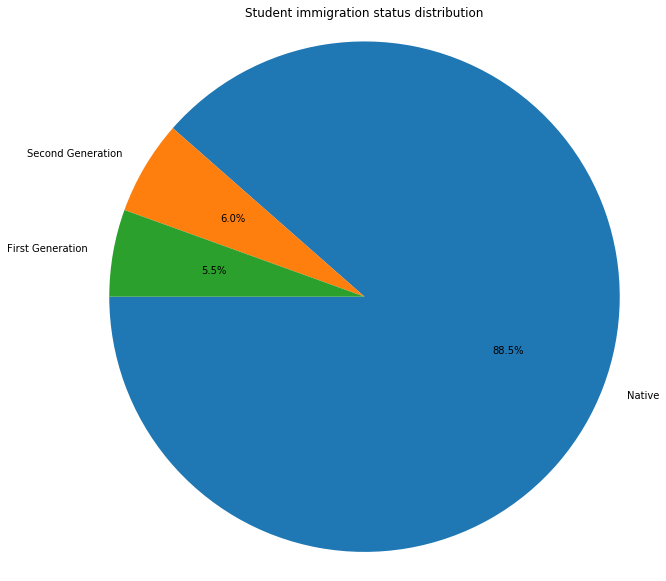

In [7]:
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
patches, texts, autotexts = ax1.pie(pisa['Immigration_Status'].value_counts(), 
                                    labels=['Native', 'Second Generation', 'First Generation'], 
                                    autopct='%1.1f%%',
                                    startangle=180
                                   );
ax1.axis('equal');
plt.tight_layout();
plt.title('Student immigration status distribution')
plt.show();

#### Immigration Status analysis:

Most of the students are native. Not a big difference between first or second generation's number of studen

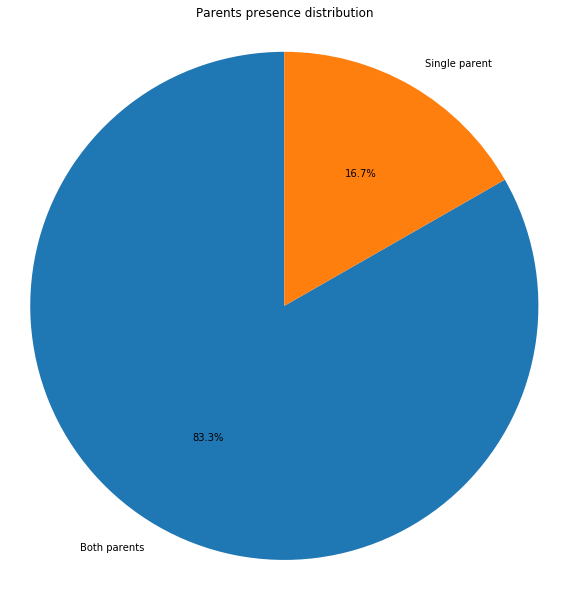

In [8]:
fig1, ax1 = plt.subplots(1, 1, figsize=(8, 8), sharex=True)
patches, texts, autotexts = ax1.pie(pisa['Parents_Presence'].value_counts(), 
                                    labels=['Both parents','Single parent'],
                                    autopct='%1.1f%%',
                                    startangle=90
                                   );
    
ax1.axis('equal');
plt.tight_layout();
plt.suptitle('Parents presence distribution', y=1.02)
plt.show();

#### Parents presence analysis

Most students have both parents, sadly 16,7% only have single mom or dad.

## Bivariate Exploration

### Gender vs Score

In [9]:
binsize=25
bins=np.arange(min(pisa['Overall_Score']),max(pisa['Overall_Score'])+binsize, binsize)

plt.title('OVERALL SCORE')
plt.hist(data=pisa.query('Gender=="Female"'),x='Overall_Score', alpha=.5, bins=bins,color='r',label='Female')
plt.hist(data=pisa.query('Gender=="Male"'),x='Overall_Score', alpha=.5, bins=bins, label='Male')
plt.legend();

Our takes:
- For overall score, distribution is normal distribution
- Look like Female scores higher
- Let's break down to performance of each gender in diffrent subjects

In [10]:
# compute the mean scores and an overall mean
df_gender_comparison = pisa.groupby(['Gender'])[['Math_Score','Science_Score','Reading_Score','Overall_Score']].mean().reset_index()
# initiate the output dataframe
cols = ['Gender','Subject','Mean_Score']
df_gender = pd.DataFrame(columns=cols)
for index, row in df_gender_comparison.iterrows(): 
    for columnname in ['Math_Score','Science_Score','Reading_Score','Overall_Score']:
        df_gender = df_gender.append({'Gender': row['Gender'],
                                 'Subject': columnname,
                                 'Mean_Score': row[columnname]}, ignore_index=True)

sns.barplot(x="Subject",y="Mean_Score",hue="Gender",data=df_gender)
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Gender', fontsize=20)
plt.ylim(400, 550 + 1);

Now we can see the difference in gender performance in each subject.

### Immigration Status vs Score

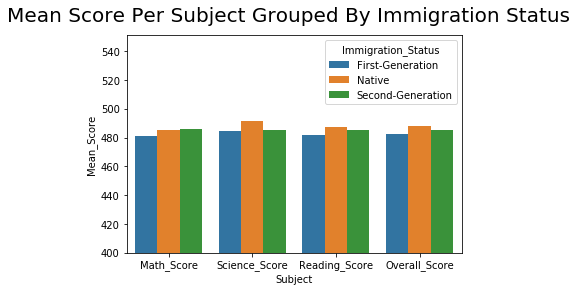

In [11]:
# compute the mean scores and an overall mean
df_status_comparison = pisa.groupby(['Immigration_Status'])[['Math_Score','Science_Score','Reading_Score','Overall_Score']].mean().reset_index()
# initiate the output dataframe
cols = ['Immigration_status','Subject','Mean_Score']
df_status = pd.DataFrame(columns=cols)
for index, row in df_status_comparison.iterrows(): 
    for columnname in ['Math_Score','Science_Score','Reading_Score','Overall_Score']:
        df_status = df_status.append({'Immigration_Status': row['Immigration_Status'],
                                 'Subject': columnname,
                                 'Mean_Score': row[columnname]}, ignore_index=True)

sns.barplot(x="Subject",y="Mean_Score",hue="Immigration_Status",data=df_status)
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Immigration Status', fontsize=20)
plt.ylim(400, 550 + 1);

Native student perform better overall except in math where Second generation have a bit higher in average. First generation perform worst compare to others.

But is that true?

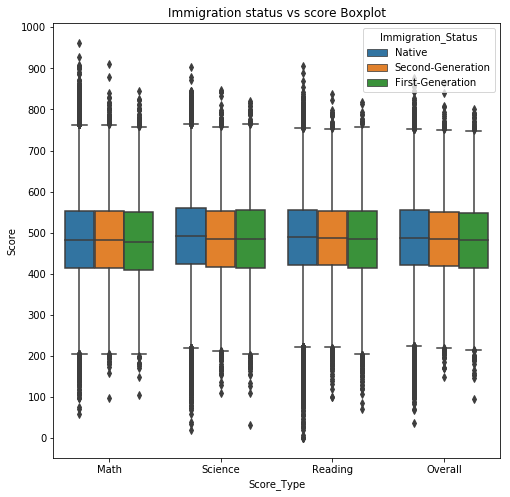

In [12]:
data = pd.melt(pisa, id_vars=['Student_Id', 'Gender', 'Country', 'Study_Time_With_Parent', 'Parents_Highest_Education', 'Immigration_Status', 'Parents_Presence'], 
               value_vars=['Math_Score','Science_Score','Reading_Score','Overall_Score'], 
               var_name="Score_Type", value_name='Score')
data['Score_Type'] = data['Score_Type'].replace('Math_Score','Math').replace('Science_Score','Science').replace('Reading_Score','Reading').replace('Overall_Score', 'Overall')

plt.figure(figsize=[8, 8]);
sns.boxplot(x = data['Score_Type'], y = data['Score'], hue=data['Immigration_Status'])
plt.title('Immigration status vs score Boxplot');
y_ticks = np.arange(0, 1000 + 1, 100)
plt.yticks(y_ticks, y_ticks);

**Immigration status and scores findings:**

- When adding the variance, then the difference between native and non native is much smaller.

- also note that the number of Native student is much more than non native students

## Parent Presence vs Score

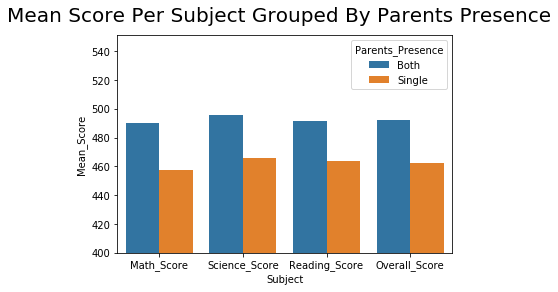

In [13]:
# compute the mean scores and an overall mean
df_status_comparison = pisa.groupby(['Parents_Presence'])[['Math_Score','Science_Score','Reading_Score','Overall_Score']].mean().reset_index()
# initiate the output dataframe
cols = ['Parents_Presence','Subject','Mean_Score']
df_status = pd.DataFrame(columns=cols)
for index, row in df_status_comparison.iterrows(): 
    for columnname in ['Math_Score','Science_Score','Reading_Score','Overall_Score']:
        df_status = df_status.append({'Parents_Presence': row['Parents_Presence'],
                                 'Subject': columnname,
                                 'Mean_Score': row[columnname]}, ignore_index=True)

sns.barplot(x="Subject",y="Mean_Score",hue="Parents_Presence",data=df_status)
# set the overall title
plt.suptitle('Mean Score Per Subject Grouped By Parents Presence', fontsize=20)
plt.ylim(400, 550 + 1);

Students with both parents perform much more better than students with single parent.

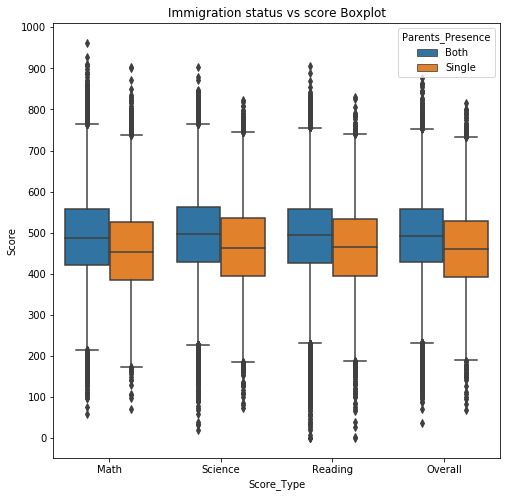

In [14]:
data = pd.melt(pisa, id_vars=['Student_Id', 'Gender', 'Country', 'Study_Time_With_Parent', 'Parents_Highest_Education', 'Immigration_Status', 'Parents_Presence'], 
               value_vars=['Math_Score','Science_Score','Reading_Score','Overall_Score'], 
               var_name="Score_Type", value_name='Score')
data['Score_Type'] = data['Score_Type'].replace('Math_Score','Math').replace('Science_Score','Science').replace('Reading_Score','Reading').replace('Overall_Score', 'Overall')

plt.figure(figsize=[8, 8]);
sns.boxplot(x = data['Score_Type'], y = data['Score'], hue=data['Parents_Presence'])
plt.title('Immigration status vs score Boxplot');
y_ticks = np.arange(0, 1000 + 1, 100)
plt.yticks(y_ticks, y_ticks);

The difference in performance here is much significant than immigration status

### Study time with parents

In [15]:
# Function draw evolution
def draw_evolution(aspect, data):
    f = sns.jointplot(x='Study_Time_With_Parent', y=aspect, data=data, space=0.5, kind='reg', xlim=(0,35), color='b')
    plt.title('Evolution of '+aspect+ '  over Studying time with parent', fontdict={'fontsize': 14})
    plt.xlabel('Study Time With Parent', fontdict={'fontsize': 12})
    plt.ylabel(aspect, fontdict={'fontsize': 12});
# draw evolution of runtime average over years
draw_evolution('Overall_Score',pisa)

Look at the graph, we could get conclusion as the longer time study with parent the worse the score is. Could be true, since studying with parent means can't work alone.

Let analyze depper.

In [16]:
ax = sns.boxplot(x=pisa['Study_Time_With_Parent'], orient='v');
ax.set(ylabel='Nr of hours')
plt.title('Study time with parent distribution');

So most of the students are studying with parent less than 5 hours, we can consider over 10 hours is outlier and will be removed for further analysis

## Multivariate Exploration

We will analysis the correlation between Science, Math and Reading Score, together with Studying Time with Parent.

In [17]:
# source: https://stackoverflow.com/questions/50832204/show-correlation-values-in-pairplot-using-seaborn-in-python
def corrfunc(x,y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    # Unicode for lowercase rho (ρ)
    rho = '\u03C1'
    ax.annotate(f'{rho} = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

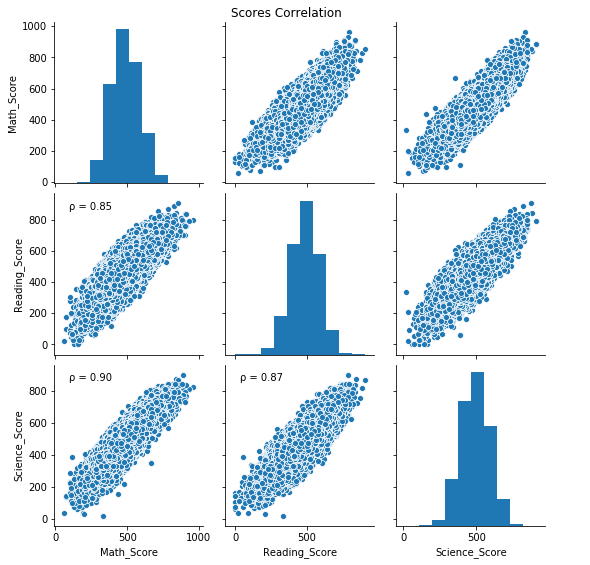

In [18]:
g = sns.pairplot(data = pisa, vars=["Math_Score", "Reading_Score", "Science_Score"]);
g.map_lower(corrfunc)
plt.suptitle("Scores Correlation", y = 1.02);

We see a good correlation for all of the pair plots (0.9 / 0.87 / 0.85). This means that the performance of individual students for a specific subject does not vary much compared to the performance in other subjects. 

#### Let's find out if parent time is helpful for each subjects

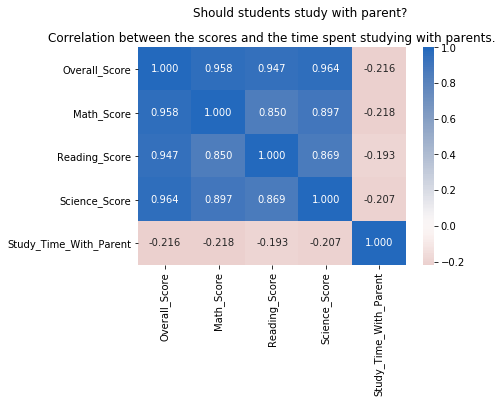

In [19]:
pisa_drop = pisa[pisa['Study_Time_With_Parent'] < 10]
ax = sns.heatmap(pisa_drop[['Overall_Score','Math_Score','Reading_Score', 'Science_Score', 'Study_Time_With_Parent']].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
ax.set(title='Correlation between the scores and the time spent studying with parents.')

plt.suptitle("Should students study with parent?", y=1.02);


Again, we see strong correlation between the 4 types of scores. The studying time with parents has weak and negative effect to the scores. However, after removing the outliers, correlation is a bit stronger.